In [ ]:
import skimage 
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [ ]:
import os
directory = './cs535-Image/Covid-Dataset/dataset/normal/'
original_imag_all_data = []

# To iterate over All the images in the folder

for filename in os.listdir(directory):
    if filename.endswith(".jpeg"):
        original_imag_all_data.append(filename)
        

print("Size: ", original_imag_all_data)
dict = {}
count = 1

for img in original_imag_all_data:
    dict[count] = mpimg.imread(directory+img).shape
    count += 1

    
print("Dict : ", dict)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

from torchvision import datasets
dir(transforms)

In [ ]:
data_to_exclude = ['covid (6).png', 'covid (14).jpeg']


class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """
    #print("path : ")
    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        if( path.split('/')[-1] not in data_to_exclude ):
            #print("path : ", path)
            #print("Original tuple : ", original_tuple)
            # make a new tuple that includes original and the path
            tuple_with_path = (original_tuple)
            return tuple_with_path
        else:
            return (torch.zeros([3, 512, 512]), 0)

In [ ]:
transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.ToTensor()
])

In [ ]:
# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = 'cs535-Image/Covid-Dataset/dataset/'
dataset = torchvision.datasets.ImageFolder(data_dir, transform = transform) # our custom dataset
dataloader_1 = torch.utils.data.DataLoader(dataset,
                                        batch_size=5,
                                        shuffle=False,
                                        num_workers=2)


dataloader_1




In [ ]:
# iterate over data

#for inputs, labels, paths in enumerate(dataloader, 0):
    # use the above variables freely
#    print("Test ")
#    print(inputs, labels, paths)

In [ ]:
image_batch, label_batch = iter(dataloader_1).next()

In [ ]:
image_batch[0].shape

In [ ]:
image_batch.shape, label_batch

In [ ]:
dataset.class_to_idx, dataset.classes

In [ ]:
# DO NOT RUN - Original Version

dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=5,
                                        shuffle=True,
                                        num_workers=2)


dataloader

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top

transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.ToTensor()
])

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top

dataset = torchvision.datasets.ImageFolder(root='cs535-Image/Covid-Dataset/dataset/', transform = transform)

dataset

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top

dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=5,
                                        shuffle=True,
                                        num_workers=2)


dataloader

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top

image_batch, label_batch = iter(dataloader).next()

In [ ]:
img = torchvision.utils.make_grid(image_batch)

img.shape

In [ ]:
img_1 = np.transpose(img, (1,2,0))
img_1.shape

In [ ]:
plt.figure(figsize=(32,24))

plt.imshow(img_1)
plt.axis('off')
plt.show()

In [ ]:
# DO NOT RUN - Original Version ->

pop_mean = []
pop_std = []



for i, data in enumerate(dataset, 0):
    #Extract Images at field position 0: 
    #print("batch Count: ", i)
    numpy_image = data[0].numpy()
    print("batch Count:numpy_image", numpy_image.shape)
    # axis=(0,2,3) => (C, H, W)
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std = np.std(numpy_image, axis=(0,2,3))
    #batch_mean = np.mean(numpy_image)
    #batch_std = np.std(numpy_image)
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [ ]:
# DO NOT RUN - Original Version -> 

pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

# (Total Batchs, ( Mean_Value , Std_Value ) => For each channel )
pop_mean.shape, pop_std.shape 

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top

pop_mean = pop_mean.mean(axis =0 )
pop_std = pop_std.mean(axis =0 )

# To Print MEAN across all the batches and standard Deviation

print("Mean across all the batches: ",pop_mean)
print("standard Deviation across all the batches: ",pop_std)

In [ ]:
# DO NOT RUN - Original Version -> Already Done At the top
pop_mean, pop_std

In [ ]:

transform = transforms.Compose([
    transforms.Resize(size=(512, 512)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.385],
                         std=[0.129])
])
#transforms.Normalize(mean=[0.385, 0.356, 0.306],
#                        std=[0.229, 0.224, 0.225])
#transforms.Normalize(mean=pop_mean,
#                        std=pop_std)
#    transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                        std=[0.229, 0.224, 0.225])

In [ ]:
#dataset_train = torchvision.datasets.ImageFolder(root='cs535-Image/Covid-Dataset/dataset/', transform = transform)

dataset_train = torchvision.datasets.ImageFolder(data_dir, transform = transform) # our custom dataset
dataset_train

In [ ]:
dataset_train.class_to_idx, dataset_train.classes

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset_train,
                                        batch_size=5,
                                        shuffle=False,
                                        num_workers=2)


dataloader

In [ ]:
image_batch, label_batch = iter(dataloader).next()
image_batch.shape

In [ ]:
img = torchvision.utils.make_grid(image_batch,nrow=5)

In [ ]:
img = np.transpose(img, (1,2,0))
img.shape

In [ ]:
m, M = img.min(), img.max()

m, M

In [ ]:


plt.figure(figsize=(16, 12))

plt.imshow(img)
plt.show()

In [ ]:
#========== Start ==========#

# Let's Start 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
import torchvision

In [ ]:



data_csv = pd.read_csv('./Data_Entry_2017.csv')
data_csv.head(2000)


In [ ]:
data_csv = pd.read_csv('./Data_Entry_2017.csv')

#col_one_list = data_csv[data_csv['Finding Labels'].eq('Cardiomegaly')]
#Cardiomegaly_list = col_one_list['Image Index'].values.tolist()
#len(Cardiomegaly_list)

total_disease_list = ['Cardiomegaly', 'No Finding', 'Nodule', 'Emphysema', 'Effusion', 'Infiltration',
                     'Hernia', 'Mass', 'Fibrosis', 'Pleural_Thickening', 'Consolidation',
                     'Pneumothorax', 'Atelectasis', 'Edema', 'Pneumonia']


image_list = {}
sum = 0

for disease in total_disease_list:
    col_one_list = data_csv[data_csv['Finding Labels'].eq(disease)]
    image_list[disease] = col_one_list['Image Index'].values.tolist()
    #sum = sum + len(image_list[disease])
    #print("Disease Name: ", disease)
    #print("Total Value Per Each Disease: ", len(image_list[disease]))
    
#print("Total : ", sum)

def getLabel( image_name, dict_image_list ):
    MULTI = 'More Than One'
    for key, value in dict_image_list.items():
        for img_name in value:
            if( img_name == image_name ):
                return key
            
    return MULTI

            
label = getLabel('00001941_007.png', image_list ) 
label

In [ ]:
data_csv[data_csv['Image Index'] == '00000003_002.png']

In [ ]:
data_csv['Finding Labels'] = data_csv['Finding Labels'].str.find('|')


In [ ]:
data_csv[data_csv['Finding Labels'] == -1]



#========== END ==========#

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F    

In [ ]:
# Gray Scale Images use 1 else 3
in_size = 1

hid1_size = 8
hid2_size = 16


out_size = 2 

k_conv_size = 5

In [ ]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.ReLU(),
            nn.BatchNorm2d(hid1_size),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.ReLU(),
            nn.BatchNorm2d(hid2_size),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(250000, out_size)

        # We override forward pass in base nn.Module that we feed into our NN on X features
    def forward(self, x):
        out = self.layer1(x)
        print("First Layer Output shape: ", out.shape)
        
        out = self.layer2(out)
        print("Second Layer Output shape: ", out.shape)
        
        
        out = out.reshape(out.size(0), -1)
        print("Reshape Output from Conv and Pulling Layer: ",out.shape)
        
        # Uncomment while you are sure that about the shape of linear layer which is needed
        out = self.fc(out)
        print("Reshape Output from Conv and Pulling Layer After : ",out.shape)
        
        return out

In [ ]:
model = ConvNet()

In [ ]:
device = torch.device("CUDA 0" if  torch.cuda.is_available() else "cpu")

print(device)

In [ ]:
learning_rate  = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 10
loss_values = list()

In [ ]:
for epoch in range(1, num_epochs):
    
    outputs = model(image_batch)
    loss = criterion(outputs, label_batch)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print('Epoch - %d, loss - %0.5f ' %(epoch, loss.item()))
    loss_values.append(loss.item())

In [ ]:
model.eval()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
data_test_dir = './cs535-Image/Covid-Dataset/Test-Covid/dataset/'
test_set = torchvision.datasets.ImageFolder(data_test_dir, transform = transform) # our custom datase

dataloader = torch.utils.data.DataLoader(test_set,
                                        batch_size=5,
                                        shuffle=False,
                                        num_workers=2)


test_image_batch, test_label_batch = iter(dataloader).next()

In [ ]:
test_set, test_image_batch.shape, test_label_batch

In [ ]:
with torch.no_grad():
    
    correct = 0
    total = 0
    
    outputs = model(test_image_batch)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = test_label_batch.cpu().numpy()
    predicted = predicted.cpu()
    
    
    print("Accuracy: ", accuracy_score(predicted, y_test))
    print("Precision: ", precision_score(predicted, y_test, average='weighted'))
    print("Recall: ", recall_score(predicted, y_test, average='weighted'))

In [1]:
import torch

from torchvision import models




resnet18 = models.resnet18()

resnet18

In [2]:
# Calling models.resnet18() instantiate ResNet18 model architecture and model is instantiated 
# random weights 

resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
# TO not just work with pre-trained models but also to use the weights 
# We can pass pretrained =  True
# This allows you to ride on the shoulders of giants. 

resnet18 = models.resnet18(pretrained=True)

In [5]:
torch.utils.model_zoo.load_url("https://download.pytorch.org/models/resnet18-5c106cde.pth",
                              model_dir="./models")

OrderedDict([('conv1.weight', Parameter containing:
              tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
                          1.7083e-02, -1.2694e-02],
                        [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
                         -1.2907e-01,  3.7424e-03],
                        [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
                          2.5632e-01,  6.3573e-02],
                        ...,
                        [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
                         -4.2058e-01, -2.5781e-01],
                        [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
                          3.9359e-01,  1.6606e-01],
                        [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
                         -8.2230e-02, -5.7828e-03]],
              
                       [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
          

In [6]:
resnet18 = models.resnet18()

resnet18.load_state_dict(torch.load("./models/resnet18-5c106cde.pth"))

<All keys matched successfully>

In [7]:
resnet18.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
                          1.7083e-02, -1.2694e-02],
                        [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
                         -1.2907e-01,  3.7424e-03],
                        [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
                          2.5632e-01,  6.3573e-02],
                        ...,
                        [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
                         -4.2058e-01, -2.5781e-01],
                        [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
                          3.9359e-01,  1.6606e-01],
                        [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
                         -8.2230e-02, -5.7828e-03]],
              
                       [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
                          6.6221

In [156]:
# All the layers except the last of the pretrained model 
# act as a fixed feature extractor for the new data 

import copy
import numpy as np

import torch 
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms

In [157]:
# Pre trained model need to be scaled to (0,1) and normalized 
# and also expect images at least of size 224 * 224 

#mean=[0.485, 0.456, 0.406]
#std=[0.229, 0.224, 0.225]
mean=[0.385]
std=[0.129]

In [158]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.Grayscale(1),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [195]:
test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [196]:
# Size of the new data on which you perform classificaton is small 
# But similarity of the data is very large so using pre0trained model as fixed feature 
# extraction make complete sense

data_train_dir = './cs535-Image/Covid-Dataset/dataset/'
train_data = torchvision.datasets.ImageFolder(data_train_dir, transform = train_transform) # our custom datase

train_data

Dataset ImageFolder
    Number of datapoints: 91
    Root location: ./cs535-Image/Covid-Dataset/dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.385], std=[0.129])
           )

In [197]:
tarin_loader = torch.utils.data.DataLoader(train_data,
                                        batch_size=15,
                                        shuffle=True,
                                        num_workers=2)

In [210]:
# Create Test Data set for the covid 

data_test_dir = './cs535-Image/Covid-Dataset/Test-Covid/'
test_data = torchvision.datasets.ImageFolder(data_test_dir, transform = train_transform) # our custom datase

test_data

Dataset ImageFolder
    Number of datapoints: 30
    Root location: ./cs535-Image/Covid-Dataset/Test-Covid/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.385], std=[0.129])
           )

In [211]:
test_loader = torch.utils.data.DataLoader(test_data,
                                        batch_size=15,
                                        shuffle=True,
                                        num_workers=2)

In [212]:
dataloaders = {
    'train': tarin_loader,
    'test' : test_loader
}

In [213]:
total_branches = { 'train': len(tarin_loader), 'test': len(test_loader)}
total_branches

{'train': 7, 'test': 2}

In [214]:
class_name = train_data.classes
print(class_name)

['covid', 'normal']


In [215]:
import matplotlib.pyplot as plt

def imshow(inp, title):
    
    inp = inp.cpu().numpy().transpose((1,2,0))
    inp = [0.229, 0.224, 0.225] * inp + [0.485, 0.456, 0.406]
    inp = np.clip(inp, 0, 1)
    
    plt.figure(figsize=(8, 5))
    
    plt.imshow(inp)
    plt.title(title)
    plt.pause(5)

In [216]:
inputs, classes = next(iter(dataloaders['train']))

In [217]:
out = torchvision.utils.make_grid(inputs)

out.shape

torch.Size([3, 454, 1810])

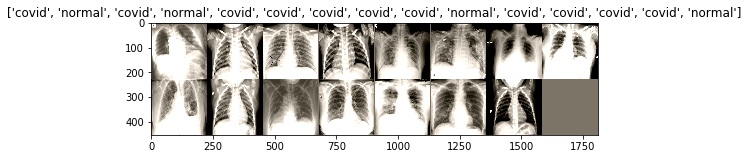

In [218]:
imshow(out, title=[class_name[x] for x in classes])

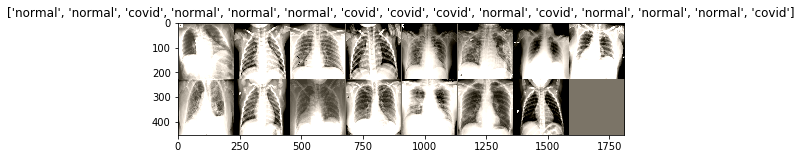

In [219]:

inputs_test___, classes_test___ = next(iter(dataloaders['test']))

teeee = torchvision.utils.make_grid(inputs_test___)

imshow(out, title=[test_data.classes[x] for x in classes_test___])

In [143]:
from torchvision import models
from NN_224 import Net
model_To_Load = './models/sgd_60_0.1_30_60_epoch_model.pth'
#model_To_Load = './models/entire_model.pth'

In [144]:
def load_model(model, path):
    model.load_state_dict(torch.load(path))
    return model


In [ ]:
import os
import datetime

os.environ['MASTER_ADDR'] = '127.0.0.1'
os.environ['MASTER_PORT'] = '17177'
os.environ['WORLD_SIZE'] = '4'
os.environ['RANK'] = '0'
#torch.distributed.init_process_group(backend='nccl')
#torch.distributed.init_process_group("gloo", rank=int(0), world_size=int(4), init_method='tcp://127.0.0.1:23277', 
#                                          timeout=datetime.timedelta(weeks=120))




In [172]:
xray_model = torch.load(model_To_Load)
model = Net()
#model.load_state_dict(xray_model)
renamed_model = {k.replace('module.',''): v for k,v in xray_model.items()}
model.load_state_dict(renamed_model)
model

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=33708, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=15, bias=True)
)

In [146]:

#criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimiz er_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [173]:
for param in model.parameters():
    param.requires_grad = False

In [148]:
#model = torch.load(model_To_Load)
#model

#model = load_model(nn.parallel.DistributedDataParallel(Net()), model_To_Load).float()
#model

In [174]:
model.out = nn.Linear(model.out.in_features, 2)
model

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=33708, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=2, bias=True)
)

In [227]:
# Final Layer is Linear layer that is why we use Cross Entropy Loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [228]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                
                scheduler.step()
                model.train()  # Set model to training mode
                
            else:
                model.eval()   # Set model to evaluate mode
                

            # Let's keep track of running loss and each epoch's correct/incorrect prediction
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    
                    outputs = model(inputs)
                    
                    _, preds = torch.max(outputs, 1)
                    
                    loss = criterion(outputs, labels)

                    # backward propagation of the loss + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            # To calculate the epoch accuracy After each epoch run this snippet
            epoch_loss = running_loss / total_branches[phase]
            epoch_acc = running_corrects.double() / total_branches[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
    print("------ Training Completed -------")
    
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model
            
        

In [229]:
model_while_train = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)

Epoch 0/49
----------


/Users/citsci/opt/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 4.6172 Acc: 11.7143
test Loss: 19.6231 Acc: 12.0000
Epoch 1/49
----------
train Loss: 1.9227 Acc: 12.2857
test Loss: 19.4162 Acc: 11.5000
Epoch 2/49
----------
train Loss: 2.6810 Acc: 12.0000
test Loss: 4.3437 Acc: 13.5000
Epoch 3/49
----------
train Loss: 16.1906 Acc: 9.7143
test Loss: 86.2931 Acc: 8.5000
Epoch 4/49
----------
train Loss: 17.3710 Acc: 11.0000
test Loss: 27.4282 Acc: 12.5000
Epoch 5/49
----------
train Loss: 15.8803 Acc: 11.2857
test Loss: 34.5472 Acc: 13.5000
Epoch 6/49
----------
train Loss: 2.5966 Acc: 12.4286
test Loss: 48.8229 Acc: 13.0000
Epoch 7/49
----------
train Loss: 1.9308 Acc: 12.4286
test Loss: 38.0079 Acc: 13.5000
Epoch 8/49
----------
train Loss: 1.5484 Acc: 12.5714
test Loss: 50.4961 Acc: 13.5000
Epoch 9/49
----------
train Loss: 1.7105 Acc: 12.5714
test Loss: 52.6675 Acc: 13.0000
Epoch 10/49
----------
train Loss: 2.8117 Acc: 12.1429
test Loss: 50.1070 Acc: 13.0000
Epoch 11/49
----------
train Loss: 1.7333 Acc: 12.5714
test Loss: 53.7930 A

In [230]:
model.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=33708, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=2, bias=True)
)

In [231]:
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in dataloaders['test']:
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on the test Images: {}% '\
          .format(100 * correct/total))

Accuracy of the model on the test Images: 86.66666666666667% 


Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


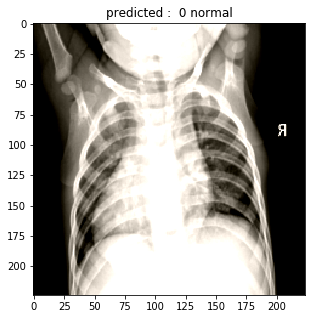

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


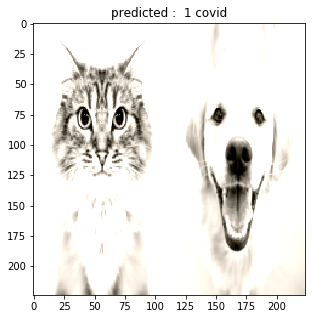

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


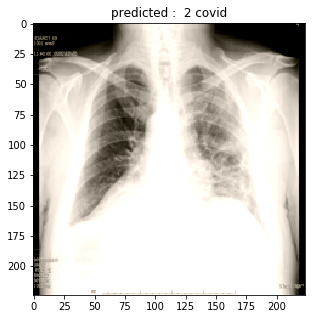

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


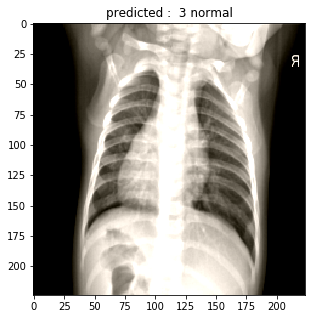

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


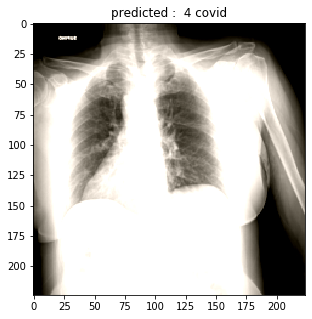

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


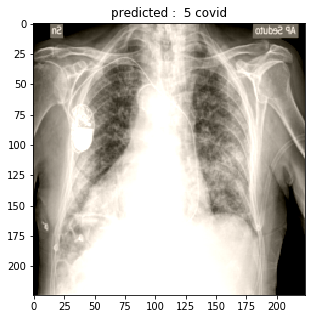

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


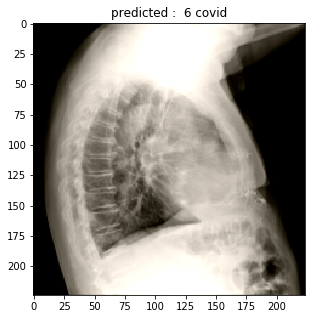

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


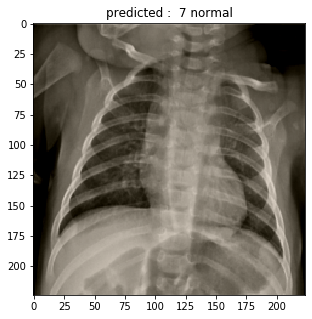

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


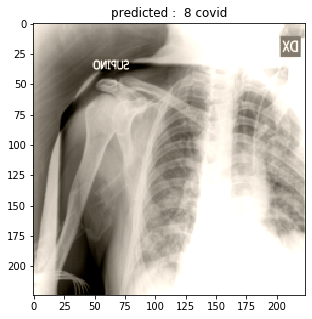

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


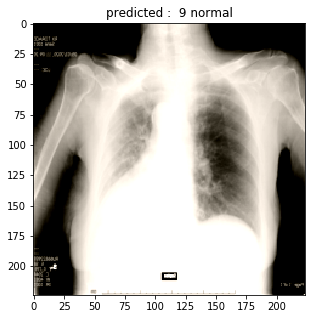

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


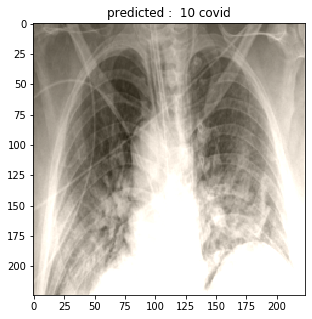

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


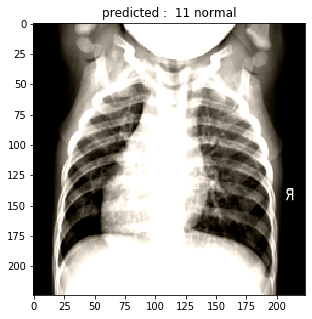

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


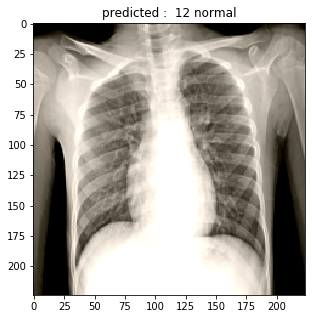

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


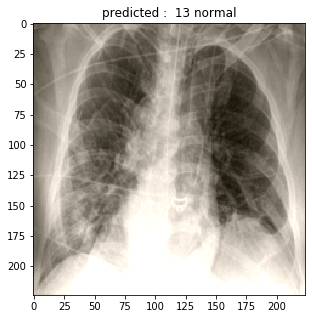

Labels :  [1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]


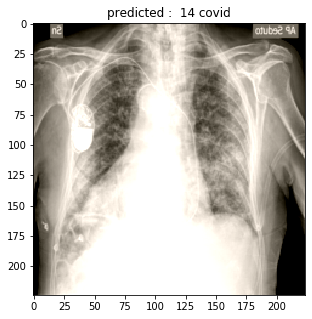

In [232]:
# Now we will pass a test images and see the predicted labels.


with torch.no_grad():
    inputs, labels = next(iter(dataloaders['test']))
    
    inp = torchvision.utils.make_grid(inputs)
    
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    
    for j in range(len(inputs)):
        inp = inputs.data[j]
        print("Labels : ", labels.numpy())
        imshow(inp, 'predicted : ' + ' '+ str(j) + ' ' + class_name[preds[j]])